<a href="https://colab.research.google.com/github/mindongjun/whimoon_AiLecture/blob/main/whimoon_AiLecture_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical Charge 데이터 셋 불러오기

In [ ]:
import pandas as pd

df=pd.read_csv("./insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 중복된 데이터(행) 확인

In [ ]:
print('# of duplicated rows:', df.duplicated().sum())

# of duplicated rows: 1


# 중복 데이터(행) 제거

In [ ]:
df.drop_duplicates(inplace=True)
print('# of duplicated rows:', df.duplicated().sum())

# of duplicated rows: 0


# 실수가 아닌 설명변수(feature) 수변환
### 대상: sex, smoker, region

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtype == 'object':
        lbl=LabelEncoder()
        lbl.fit(list(df[col].values))
        df[col]=lbl.transform(df[col].values)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# 데이터 셋 생성

## 1) 설명변수, 반응변수 생성

In [ ]:
#Split and Scaling Data
X=df.drop('charges',axis=1)
y=df['charges']

## 2) Train, Validation, Test set 생성
## (validation은 생략)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20, random_state=45)

## 다항식 변환 --> 다항회귀

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(4) # 4차항까지 추가
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [ ]:
print('X_train, y_train shape:', X_train.shape, y_train.shape)
print('X_test, y_test shape:', X_test.shape, y_test.shape)

X_train, y_train shape: (1069, 210) (1069,)
X_test, y_test shape: (268, 210) (268,)


# 설명 변수의 범위 스케일링(scaling)
## 표준화 $X=\frac{X - \mu}{\sigma}$

In [ ]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# 선형회귀 모델 생성

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
# regressor = Lasso(alpha=3)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 1) 모델학습

## 회귀식 출력 (do not modify)

In [ ]:
len_coef = len(regressor.coef_)
print('y = ', end='')
for i in range(len_coef+1):
    end_str = ' - ' if regressor.coef_[i-1] < 0 else ' + '

    if i == 0:
        print('%.3f'%regressor.intercept_, end='')
    elif i != len_coef:
        print('%s%.3f x%d'%(end_str, abs(regressor.coef_[i-1]), i), end='')
    else:
        print('%s%.3f x%d'%(end_str, abs(regressor.coef_[i-1]), i))
    

y = 13508.552 - 0.000 x1 + 35560.178 x2 + 5247.931 x3 - 28405.006 x4 + 10884.323 x5 + 13961.794 x6 + 8002.644 x7 - 57825.353 x8 - 9908.973 x9 - 55589.248 x10 - 17486.668 x11 - 9358.879 x12 + 9615.655 x13 + 5247.931 x14 - 12240.270 x15 + 336.797 x16 - 926.698 x17 - 3311.709 x18 + 115651.952 x19 - 3233.430 x20 - 56394.153 x21 - 15850.292 x22 + 11878.834 x23 - 1382.615 x24 - 18228.082 x25 + 13961.794 x26 + 4068.564 x27 - 2977.539 x28 + 52485.337 x29 + 12069.514 x30 + 38381.901 x31 + 11720.272 x32 + 7435.412 x33 - 15737.476 x34 - 9908.973 x35 + 14857.611 x36 - 172.440 x37 + 1607.988 x38 + 1469.350 x39 + 39001.432 x40 + 7654.518 x41 + 24634.884 x42 - 11673.812 x43 - 17847.206 x44 + 3430.686 x45 + 5225.367 x46 - 9358.879 x47 - 6748.213 x48 + 12796.510 x49 + 5247.931 x50 - 12240.270 x51 + 336.797 x52 - 926.698 x53 - 3311.709 x54 + 10414.342 x55 - 3741.434 x56 + 3713.096 x57 + 8847.476 x58 + 11.849 x59 - 1226.202 x60 + 3779.848 x61 - 926.698 x62 - 911.694 x63 + 1049.313 x64 - 128123.980 x65 - 

## 2) 예측

In [ ]:
import numpy as np

In [ ]:
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

### a) 학습 데이터 셋 예측

In [ ]:
train_pred_df = pd.DataFrame({'y_train':np.array(y_train), 'train predict':train_predict})
train_pred_df.head(10)

,y_train,train predict
0,8240.58960,9331.624042
1,13831.11520,13304.355788
2,9634.53800,8590.275746
3,11763.00090,13343.267498
4,7050.02130,9934.688890
5,14254.60820,14639.517012
6,5910.94400,6656.895973
7,11657.71890,12353.933460
8,10796.35025,11876.165369
9,2730.10785,5319.969322


### b) 테스트 데이터 셋 예측

In [ ]:
train_pred_df = pd.DataFrame({'y_test':np.array(y_test), 'test predict':test_predict})
train_pred_df.head(10)

,y_test,test predict
0,14571.89080,14034.121539
1,17904.52705,21559.253032
2,5138.25670,3822.969504
3,20781.48892,13332.631469
4,1242.26000,-59.462370
5,3877.30425,7910.740561
6,2438.05520,6142.539986
7,10797.33620,14079.869254
8,14410.93210,12581.101539
9,18218.16139,4447.097238


## 3) 평가
## $R^2=1-\frac{\sum^{n}_{i=1}(y_i-\hat{y_i})^2}{\sum^{n}_{i=1}(y_i-\bar{y_i})^2}$
### 0과 1사이의 값, 1에 가까울 수록 좋은모델(오차(분자)가 0이므로)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
train_r2 = r2_score(y_train, train_predict)
test_r2 = r2_score(y_test, test_predict)

print('Train R2 score:', train_r2)
print('Test R2 score:', test_r2)

Train R2 score: 0.8668894659685831
Test R2 score: 0.8135908598635389


## 4) 관측, 예측 산점도

In [ ]:
import matplotlib.pyplot as plt

### a) 학습 데이터 셋

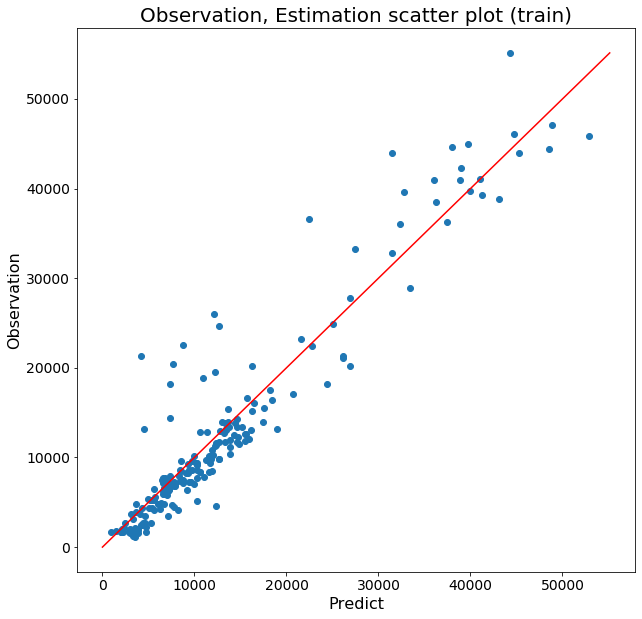

Train R2 score: 0.8668894659685831


In [ ]:
plot_size = 200
plt.figure(figsize=(10, 10))
plt.scatter(train_predict[:plot_size], y_train[:plot_size])
max_value = max(y_train[:plot_size].max(), train_predict[:plot_size].max())
plt.plot([0, max_value], [0, max_value], 'k-', color='red')

plt.title('Observation, Estimation scatter plot (train)', size=20)
plt.xlabel('Predict', size=16)
plt.xticks(size=14)
plt.ylabel('Observation', size=16)
plt.yticks(size=14)
plt.show()
print('Train R2 score:', train_r2)

### b) 테스트 데이터 셋

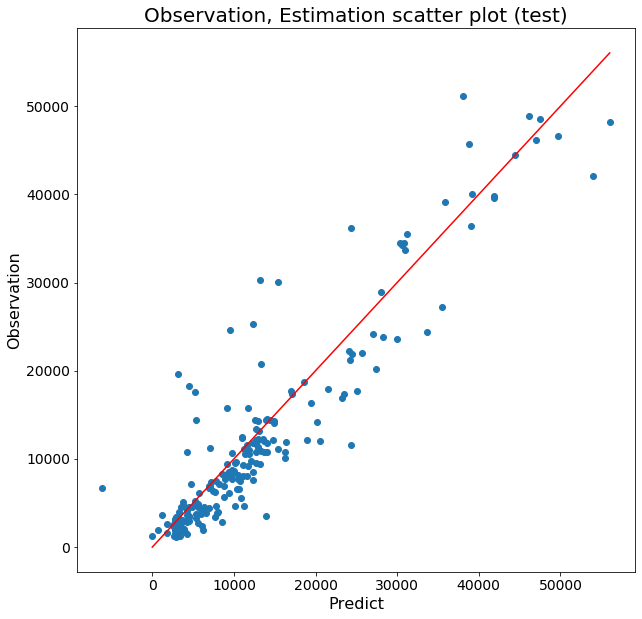

Test R2 score: 0.8135908598635389


In [ ]:
plot_size = 200
plt.figure(figsize=(10, 10))
plt.scatter(test_predict[:plot_size], y_test[:plot_size])
max_value = max(y_test[:plot_size].max(), test_predict[:plot_size].max())
plt.plot([0, max_value], [0, max_value], 'k-', color='red')

plt.title('Observation, Estimation scatter plot (test)', size=20)
plt.xlabel('Predict', size=16)
plt.xticks(size=14)
plt.ylabel('Observation', size=16)
plt.yticks(size=14)
plt.show()
print('Test R2 score:', test_r2)

# L1 정규화를 사용한 선형회귀 모델 생성
## $Lasso = 선형회귀 + L1 정규화$
## $\sum^{n}_{i=1}(y_{i}-\hat{y_{i}})+\alpha \sum^{p}_{j=1}|\beta_j|$

## 1) 모델 선언 및 학습

In [ ]:
from sklearn.linear_model import Lasso
regressor = Lasso(alpha=3, max_iter=10000)
regressor.fit(X_train, y_train)

Lasso(alpha=3, copy_X=True, fit_intercept=True, max_iter=10000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

## 2) 예측

In [ ]:
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

## 3) 평가: R2 score

In [ ]:
train_r2 = r2_score(y_train, train_predict)
test_r2 = r2_score(y_test, test_predict)

print('Train R2 score:', train_r2)
print('Test R2 score:', test_r2)

Train R2 score: 0.8577133615963727
Test R2 score: 0.8415213700756536


## 4) 관측, 예측 산점도

### a) 학습 데이터 셋

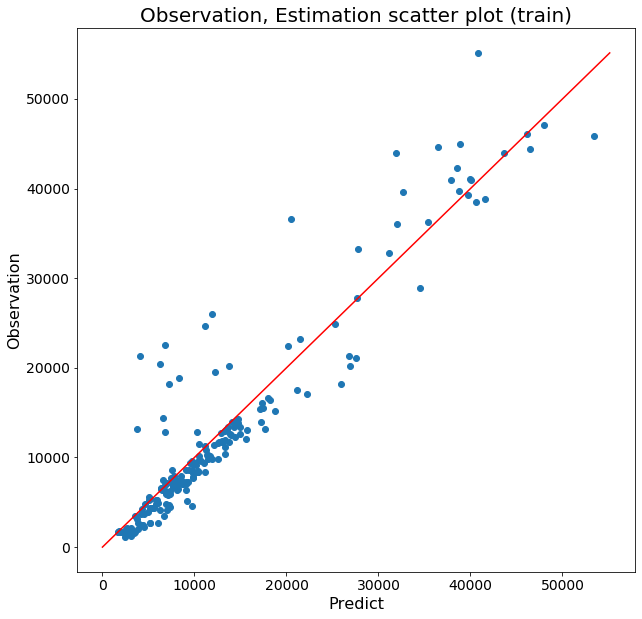

Train R2 score: 0.8577133615963727


In [ ]:
plot_size = 200
plt.figure(figsize=(10, 10))
plt.scatter(train_predict[:plot_size], y_train[:plot_size])
max_value = max(y_train[:plot_size].max(), train_predict[:plot_size].max())
plt.plot([0, max_value], [0, max_value], 'k-', color='red')

plt.title('Observation, Estimation scatter plot (train)', size=20)
plt.xlabel('Predict', size=16)
plt.xticks(size=14)
plt.ylabel('Observation', size=16)
plt.yticks(size=14)
plt.show()
print('Train R2 score:', train_r2)

### b) 테스트 데이터 셋

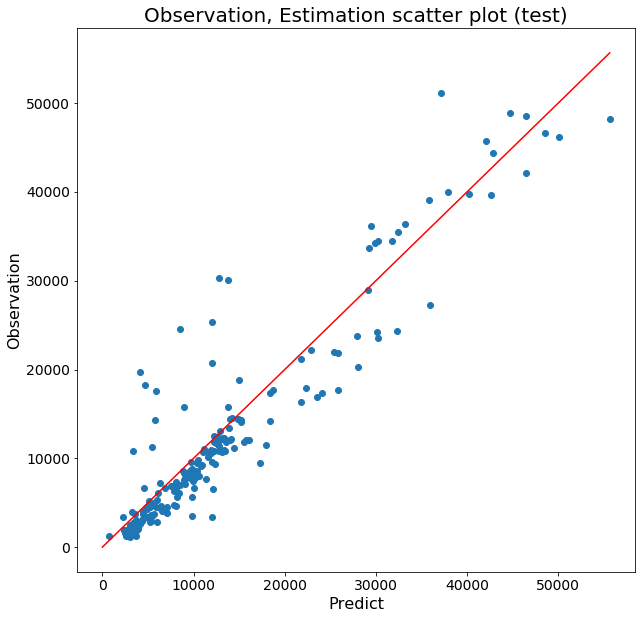

Test R2 score: 0.8415213700756536


In [ ]:
plot_size = 200
plt.figure(figsize=(10, 10))
plt.scatter(test_predict[:plot_size], y_test[:plot_size])
max_value = max(y_test[:plot_size].max(), test_predict[:plot_size].max())
plt.plot([0, max_value], [0, max_value], 'k-', color='red')

plt.title('Observation, Estimation scatter plot (test)', size=20)
plt.xlabel('Predict', size=16)
plt.xticks(size=14)
plt.ylabel('Observation', size=16)
plt.yticks(size=14)
plt.show()
print('Test R2 score:', test_r2)